**Sprawozdanie lab3 Krzysztof Kucaba**

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import time

<a id='zad1'></a>
***Zadanie 1.***  

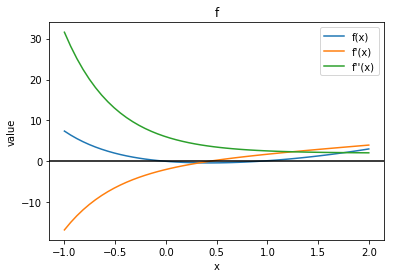

In [24]:
def f(x):
    return math.e**(-2*x) + x**2 -1

def df(x):
    return -2*math.e**(-2*x) + 2*x

def ddf(x):
    return 4*math.e**(-2*x) + 2

x = np.linspace(-1,2)
y=f(x)
plt.plot(x,y,label='f(x)')
y=df(x)
plt.plot(x,y,label='f\'(x)')
y=ddf(x)
plt.plot(x,y,label='f\'\'(x)')
plt.xlabel('x')
plt.ylabel('value')
plt.axhline(0,color='black')
plt.title('f')
plt.legend()
plt.show()

<a id='zad2'></a>
***Zadanie 2.*** 

In [25]:
def bisect(f,x1,x2,ite=50,tol=10**-10):
    t=ite

    while(True):
        xb=(x2+x1)/2
        fx = f(xb)
        if(abs(x2-xb)<=tol or ite ==1):
            return (xb,t-ite)
        if(fx*f(x1)<0):
            x2=xb
            ite=ite-1
            continue
        if(fx*f(x2)<0):
            x1=xb
            ite=ite-1
            continue
        if(fx==0):
            return (xb,t-ite)
        print("w przedziale {0} do {1} nie ma miejsc zerowych".format(x1,x2))
        
t1=time.clock()
print('Mój bisect: {0}'.format(bisect(f,-0.25,0.4,ite=50)))
t2=time.clock()
print('Czas: {:.7f}\n'.format(t2-t1))

t1=time.clock()
print('Biblioteczny bisect: {0}'.format(scipy.optimize.bisect(f=f,a=-0.25,b=0.4,maxiter=50,xtol=10**-10)))
t2=time.clock()
print('Czas: {:.7f}\n'.format(t2-t1))

print("Funkcja musi być ciągła i przyjmować różne znaki na końcach przedziałów\n")

Mój bisect: (5.8207746315238534e-12, 32)
Czas: 0.0008824

Biblioteczny bisect: 5.8207746315238534e-12
Czas: 0.0001858

Funkcja musi być ciągła i przyjmować różne znaki na końcach przedziałów



<a id='zad3'></a>
***Zadanie 3.***  

In [26]:
def styczne(f,df,x0,ite=50,tol=10**-10):
    t=ite
    while(True):
        x1=x0-(f(x0)/df(x0))
        if(ite == 1):
            return (x1,t-ite)
        if(abs(x0-x1)<=tol):
            return (x1,t-ite)
        if(f(x1)==0):
            return (x1,t-ite)
        x0=x1
        ite=ite-1
        
t1=time.clock()
print('Moje styczne: {0}'.format(styczne(f,df,-0.25,ite=50)))
t2=time.clock()
print('Czas: {:.7f}\n'.format(t2-t1))

t1=time.clock()
print('Biblioteczne styczne: {0}'.format(scipy.optimize.newton(func=f,x0=-0.25,fprime=df,tol=10**-10)))
t2=time.clock()
print('Czas: {:.7f}\n'.format(t2-t1))

print("Funkcja musi być ciągła, posiada różne znaki na końcach przedziału, posiada stałe znaki pierwszej i drugiej pochodnej na tym przedziale\n")


Moje styczne: (-5.2465474697379417e-17, 4)
Czas: 0.0002016

Biblioteczne styczne: -5.2465474697379417e-17
Czas: 0.0001012

Funkcja musi być ciągła, posiada różne znaki na końcach przedziału, posiada stałe znaki pierwszej i drugiej pochodnej na tym przedziale



<a id='zad4'></a>
***Zadanie 4.***  

In [27]:
def sieczne(f,x0,x1,tol=10**-10,ite=50):
    t=ite
    while(True):
        x2=x1 - ((f(x1)*(x1-x0))/(f(x1)-f(x0)))
        if(ite == 1 or x2==0):
            return (x2,t-ite)
        if(abs(x1-x2)<=tol):
            return (x2,t-ite)
        if(f(x2)==0):
            return (x2,t-ite)
        x0=x1
        x1=x2
        ite=ite-1
        
        
t1=time.clock()
print('Moje sieczne: {0}'.format(sieczne(f,-0.25,0.3,ite=50)))
t2=time.clock()
print('Czas: {:.7f}\n'.format(t2-t1))

t1=time.clock()
print('Biblioteczne sieczne: {0}'.format(scipy.optimize.newton(func=f,x0=-0.25,tol=10**-10)))
t2=time.clock()
print('Czas: {:.7f}\n'.format(t2-t1))
            
print("Funkcja musi być ciągła, posiada różne znaki na krańcach przedziału, nie posiada na przedziale maximum lokalnego\n")
    

Moje sieczne: (-2.6847184785448516e-17, 7)
Czas: 0.0002190

Biblioteczne sieczne: 3.5586237242500555e-18
Czas: 0.0001001

Funkcja musi być ciągła, posiada różne znaki na krańcach przedziału, nie posiada na przedziale maximum lokalnego



In [28]:
print("Najszybszą metodą jest metoda siecznych, najwolniej działa metoda bisekcji\n")

Najszybszą metodą jest metoda siecznych, najwolniej działa metoda bisekcji

